In [2]:
import pandas as pd

df = pd.read_csv('bike.tsv', sep = '\t')
df.head(3)

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349


In [8]:
weather = pd.read_csv('weather.csv', encoding = 'shift-jis')
weather.head(3)

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [9]:
temp = pd.read_json('temp.json')
temp.head(3)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
hum,0.805833,0.696087,0.437273,0.590435,0.436957,0.518261,0.498696,0.535833,0.434167,0.482917,...,0.44125,0.515417,0.791304,0.734783,0.823333,0.652917,0.59,0.752917,0.483333,0.5775


In [23]:
temp = temp.T

In [24]:
df2 = df.merge(weather, how = 'inner', on = 'weather_id') # 内部結合
df2.head(3)

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
2,2011-01-07,0,5,1,2,1510,曇り


In [25]:
df2.groupby('weather').mean()['cnt']

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_60852/4224178096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('weather').mean()['cnt']


weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [26]:
df3 = df2.merge(temp, how = 'left', on = 'dteday') # 外部結合
df3[df3['dteday'] == '2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: >

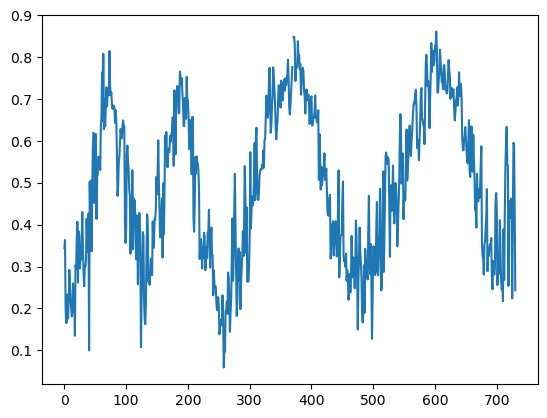

In [27]:
%matplotlib inline
df3['temp'].plot(kind = 'line')

<Axes: >

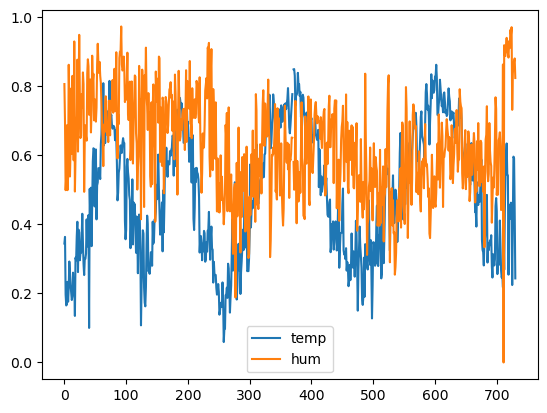

In [29]:
df3[['temp', 'hum']].plot(kind = 'line')

<Axes: ylabel='Frequency'>

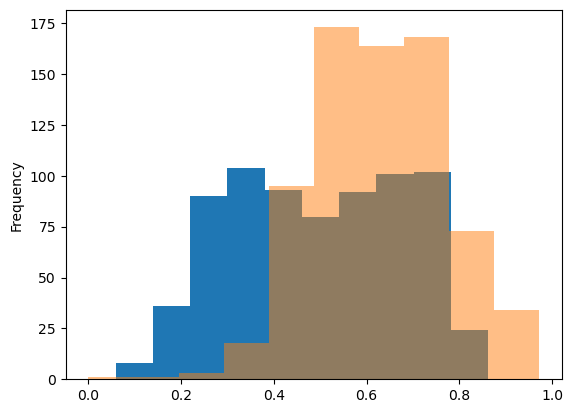

In [30]:
df3['temp'].plot(kind = 'hist')
df3['hum'].plot(kind = 'hist', alpha = 0.5)

<Axes: >

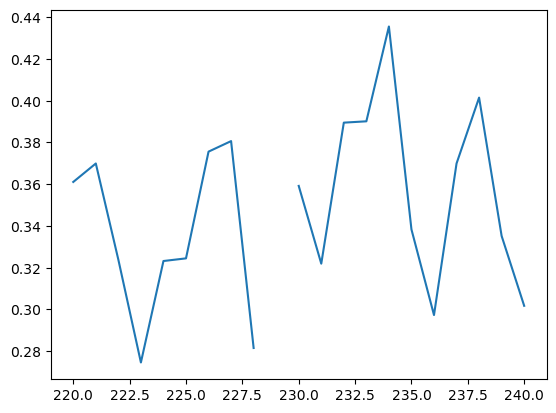

In [31]:
df3['atemp'].loc[220:240].plot(kind = 'line')

<Axes: >

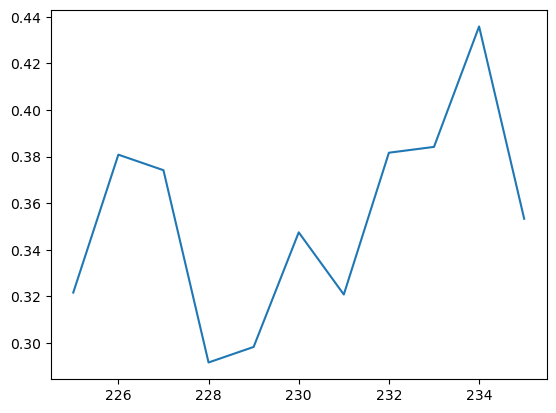

In [33]:
df3['atemp'] = df3['atemp'].astype(float)
df3['atemp'] = df3['atemp'].interpolate()

df3.loc[225:235, 'temp'].plot(kind = 'line')

In [35]:
# マハラノビス距離
from sklearn.covariance import MinCovDet

df4 = df3.loc[:, 'atemp':'windspeed']
df4 = df4.dropna() # 欠損値の削除

# マハラノビス距離を計算するための準備
mcd = MinCovDet(random_state = 0, support_fraction = 0.7)
mcd.fit(df4)

# マハラノビス距離
distance = mcd.mahalanobis(df4)
distance

array([5.27754434e+00, 2.95288431e+00, 4.56554287e+00, 1.11292894e+01,
       4.88709108e+00, 3.61583593e+00, 8.14460849e+00, 6.75556991e+00,
       2.87723941e+00, 5.21488750e+00, 3.79416537e+00, 5.40316379e+00,
       6.20213715e+00, 1.10553049e+01, 8.90271314e+00, 3.76946284e+00,
       9.37787119e+00, 8.19067907e+00, 9.96797528e+00, 4.96633549e+00,
       9.49019954e+00, 8.66205425e+00, 4.97595770e+00, 4.10070771e+00,
       1.69047652e+01, 6.72016281e+00, 4.26099138e+00, 1.44169140e+00,
       2.48070141e+00, 5.30852520e+00, 6.32167727e+00, 1.09093890e+01,
       4.97013012e+00, 2.46016070e+00, 8.26586093e+00, 1.55628115e+00,
       1.11467060e+01, 7.12123114e+00, 5.31412121e+00, 3.68894563e+00,
       1.91868229e+03, 4.79217095e+00, 6.04087328e+00, 1.83355572e-01,
       5.17790203e+00, 5.63622705e+00, 2.28418229e+00, 9.46535988e+00,
       6.11551425e+00, 2.28464022e+00, 1.26942361e+00, 7.86245236e+00,
       7.40873776e+00, 3.31990003e+00, 5.12019709e+00, 3.36617674e+00,
      

<Axes: >

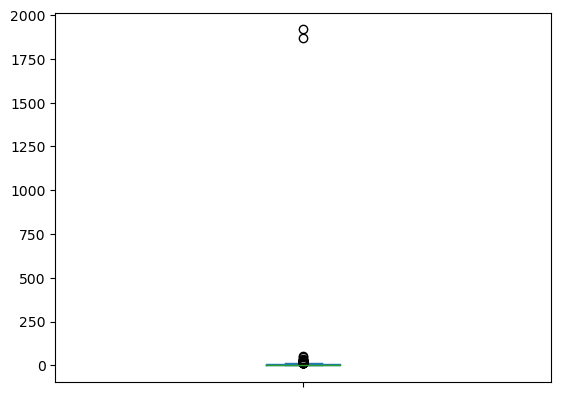

In [36]:
# 箱ひげ図
distance = pd.Series(distance)
distance.plot(kind = 'box')

In [37]:
tmp = distance.describe()
tmp

count     730.000000
mean       10.571304
std        98.889470
min         0.183356
25%         2.302019
50%         3.780568
75%         6.517596
max      1918.682293
dtype: float64

In [39]:
# 四分位範囲を用いた外れ値の判定
iqr = tmp['75%'] - tmp['25%'] # IQR計算
jougen = 1.5 * (iqr) + tmp['75%'] # 上限値
kagen = tmp['25%'] - 1.5 * (iqr) # 下限値

outliner= distance[(distance > jougen) | (distance < kagen)]
outliner

24       16.904765
40     1918.682293
73       55.357957
81       15.463534
84       18.971056
91       23.001774
92       45.588676
94       15.758195
96       13.702627
130      12.903433
131      13.343114
147      14.180961
203      18.506569
218      14.180812
240      14.623922
243      22.325451
251      30.503908
253      17.347400
254      18.559749
257      23.277609
259      14.843623
264      13.075809
267      21.425291
272      14.908148
277      32.693499
286      16.683825
293      13.484822
375      13.154613
424      16.419222
473      14.412725
474      30.488845
480      18.619394
484      21.011948
497      38.434241
506      27.044165
515      24.183972
536      13.034591
544      13.592724
629    1867.324064
691      21.181155
706      24.551635
708      18.009731
709      20.933194
710      25.115724
711      14.380396
712      13.419876
713      12.949065
714      14.051767
715      27.473939
718      30.054611
724      14.980544
728      15.933540
729      23.